**IMPORTING REQUIRED LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

**LOADING THE DATA**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**ANALYZING THE DATA**

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[1]

0

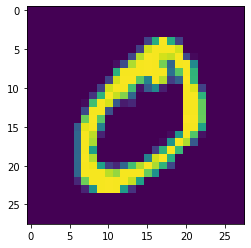

In [6]:
plt.imshow(X_train[1])

**DATA PRE-PROCESSING**

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**BUILDING THE MODEL**

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

**TRAINING THE MODEL**

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 204s 108ms/step - loss: 0.2076 - accuracy: 0.9536 - val_loss: 0.0868 - val_accuracy: 0.9730
Epoch 2/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0644 - accuracy: 0.9802 - val_loss: 0.0818 - val_accuracy: 0.9772
Epoch 3/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0494 - accuracy: 0.9844 - val_loss: 0.0700 - val_accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0958 - val_accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.1159 - val_accuracy: 0.9749


**TESTING THE MODEL**

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics:\n(Test Loss & Test Accuracy): ")
print(metrics)

Metrics:
(Test Loss & Test Accuracy): 
[0.11594527959823608, 0.9749000072479248]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 93ms/step
[[3.8792835e-14 8.3256153e-19 1.2104955e-09 3.5258818e-10 1.6482299e-16
  4.5727086e-18 2.5164220e-19 1.0000000e+00 1.5363114e-11 1.9485049e-12]
 [1.7578901e-10 2.8832210e-12 1.0000000e+00 1.5988402e-11 1.5245395e-14
  6.1881199e-16 2.2654276e-09 1.2832406e-17 1.1551003e-09 3.0198635e-18]
 [9.4571995e-08 9.9983597e-01 3.3095176e-07 6.2954503e-10 2.2472517e-05
  4.5596639e-06 4.8946657e-08 2.1710314e-10 1.3647172e-04 1.6306684e-09]
 [9.9999988e-01 2.8434036e-15 2.3809971e-11 1.6530215e-16 6.1028758e-14
  5.0687368e-13 1.1864643e-07 5.4995063e-15 4.8861692e-11 4.9108330e-12]]


In [16]:
print(np.argmax(prediction, axis=1))
print(Y_test[:5])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**SAVING THE MODEL**

In [17]:
model.save("MNIST_model.h5")

**TESTING THE SAVED MODEL**

In [18]:
from keras import models
from keras.models import load_model

In [19]:
model=load_model("MNIST_model.h5")

In [20]:
from keras.preprocessing import image

In [21]:
img = Image.open("sample.jpg").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 172ms/step
0    5
Name: Label, dtype: int64
